In [1]:
# In this notebook along to the tiling I am also going to add the standard augmentation techniques such as rot. / shift.

### Preparing the dataframe 

In [2]:
import pandas as pd
import glob
from pathlib import Path
import matplotlib.pyplot as plt 

In [3]:
# Gdrive shit path
# #/Users/krish/Library/CloudStorage/GoogleDrive-krishthephysicist@gmail.com/My Drive/ljmu/1.data
# root_path =  r'/Users/krish/Library/CloudStorage/GoogleDrive-krishthephysicist@gmail.com/My Drive/ljmu/'
# result_root = root_path + '3.results/06112022-tiling+augmentation/'
# Path(result_root).mkdir(parents=True, exist_ok=True)

In [4]:
# Mac local path
root_path =  r'/Users/krish/ljmu/'
result_root = root_path + '3.results/06112022-tiling+augmentation/'
Path(result_root).mkdir(parents=True, exist_ok=True)

In [5]:
df_true = pd.DataFrame(columns = ['name','flag'])
df_false = pd.DataFrame(columns = ['name','flag'])

df_true['name'] = glob.glob(root_path+'1.data/sampletiled/ts/*.jpg')
df_true.flag = 1

df_false['name'] = glob.glob(root_path+'1.data/sampletiled/false/*.jpg')
df_false.flag = 0

df = df_true.append(df_false)

/var/folders/zk/p2gyqg915639vx6xr9xbs9cm0000gn/T/ipykernel_23397/487420066.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_true.append(df_false)


In [6]:
df_true.shape

(3215, 2)

In [7]:
df_false.shape

(3875, 2)

In [8]:
df

,name,flag
0,/Users/krish/ljmu/1.data/sampletiled/ts/905_0_...,1
1,/Users/krish/ljmu/1.data/sampletiled/ts/889_0_...,1
2,/Users/krish/ljmu/1.data/sampletiled/ts/1434_0...,1
3,/Users/krish/ljmu/1.data/sampletiled/ts/5708_0...,1
4,/Users/krish/ljmu/1.data/sampletiled/ts/100_0_...,1
...,...,...
3870,/Users/krish/ljmu/1.data/sampletiled/false/238...,0
3871,/Users/krish/ljmu/1.data/sampletiled/false/197...,0
3872,/Users/krish/ljmu/1.data/sampletiled/false/198...,0
3873,/Users/krish/ljmu/1.data/sampletiled/false/474...,0


In [9]:
import os
os.getcwd()
glob.glob("")

[]

### Training as before

In [10]:
#!pip install skimage

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # showing and rendering figures
# io related
from skimage.io import imread
import os
from glob import glob
# not needed in Kaggle, but required in Jupyter
%matplotlib inline 

In [12]:
#!pip install scikit-image

In [13]:
#!pip install tensorflow

In [14]:
df['flag'] = df.flag.apply(lambda x: str(x)) # used the qubit format

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#!pip install sklearn

In [17]:
train_df, valid_df = train_test_split(df, 
                                   test_size = 0.25, 
                                   random_state = 2018,
                                   stratify = df['flag']) # Stratify makes sure that the subset of training and testing data returned keeps the same class propotion of the main dataframe
print('train', train_df.shape[0], 'validation', valid_df.shape[0])

train 5317 validation 1773


In [18]:
from tensorflow.keras import layers
from keras_preprocessing.image import ImageDataGenerator

In [19]:
datagen = ImageDataGenerator(rescale=1./255.)

train_generator = datagen.flow_from_dataframe(dataframe=train_df, x_col = 'name', y_col = 'flag', class_mode='binary', target_size=(224 , 224), batch_size=32)
valid_generator = datagen.flow_from_dataframe(dataframe=valid_df, x_col = 'name', y_col = 'flag', class_mode='binary', target_size=(224 , 224), batch_size=32)

Found 5317 validated image filenames belonging to 2 classes.
Found 1773 validated image filenames belonging to 2 classes.


### Bring in the model

In [23]:
import tensorflow as tf
from tensorflow.keras.layers import Input , Dense , Flatten , GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

In [30]:
# i'll be using inception_v3 for this model , along with 2 extra dense layers and the output layer
# (224,224,3) is the default shape for imagent and that actually cant bechanged
mobilenet = tf.keras.applications.mobilenet.MobileNet(input_shape=(224 , 224, 3),
                                           include_top=False, 
                                           weights='imagenet')

model = Sequential()
model.add(mobilenet)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))

model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))

model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))



model.add(Dense(1, activation="sigmoid" , name="classification"))

Metal device set to: Apple M1


2022-11-07 17:22:45.945145: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-07 17:22:45.945475: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [31]:
# model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001,momentum=0.9), 
#             loss='categorical_crossentropy',
#             metrics = ['accuracy'])

# model.summary()

In [32]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001,momentum=0.9), 
            loss='BinaryCrossentropy',
            metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 1024)              5

In [33]:
class_weight = {0:1.,1:1.5}
history = model.fit(train_generator, validation_data = valid_generator, epochs = 20, class_weight=class_weight)

Epoch 1/20


2022-11-07 17:22:47.068574: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-07 17:22:48.085224: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


167/167 [==============================] - ETA: 0s - loss: 0.8224 - accuracy: 0.4553

2022-11-07 17:24:45.458290: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


167/167 [==============================] - 132s 773ms/step - loss: 0.8224 - accuracy: 0.4553 - val_loss: 0.6811 - val_accuracy: 0.4738
Epoch 2/20
167/167 [==============================] - 138s 827ms/step - loss: 0.7825 - accuracy: 0.5112 - val_loss: 0.6364 - val_accuracy: 0.6142
Epoch 3/20
167/167 [==============================] - 91s 542ms/step - loss: 0.7221 - accuracy: 0.6468 - val_loss: 0.5719 - val_accuracy: 0.7039
Epoch 4/20
167/167 [==============================] - 77s 460ms/step - loss: 0.6389 - accuracy: 0.7470 - val_loss: 0.4923 - val_accuracy: 0.7862
Epoch 5/20
167/167 [==============================] - 76s 453ms/step - loss: 0.5440 - accuracy: 0.8119 - val_loss: 0.4065 - val_accuracy: 0.8347
Epoch 6/20
167/167 [==============================] - 78s 466ms/step - loss: 0.4576 - accuracy: 0.8458 - val_loss: 0.3515 - val_accuracy: 0.8607
Epoch 7/20
167/167 [==============================] - 77s 459ms/step - loss: 0.4039 - accuracy: 0.8650 - val_loss: 0.3153 - val_accuracy: 0

In [34]:
model.save(result_root+'mobilenet_after_tiling_20epochs')

INFO:tensorflow:Assets written to: /Users/krish/ljmu/3.results/06112022-tiling+augmentation/mobilenet_after_tiling_10epochs/assets


INFO:tensorflow:Assets written to: /Users/krish/ljmu/3.results/06112022-tiling+augmentation/mobilenet_after_tiling_10epochs/assets


In [35]:
from tensorflow import keras
model = keras.models.load_model(result_root+'mobilenet_after_tiling_20epochs')

2022-11-07 17:51:18.347117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


56/56 - 7s - loss: 0.2448 - accuracy: 0.9052 - 7s/epoch - 131ms/step


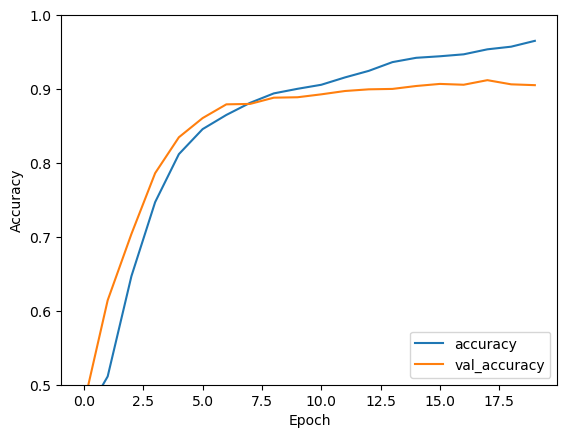

In [36]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(valid_generator, verbose=2)

plt.savefig(result_root+'accuracy_after_tiling.png')

In [37]:
# Spoke with sharma, this validation is basically the test score, as it does not feedback into the model training phase.
# class_weight = {0:1.,1:2.}
# history = model.fit(train_generator, epochs = 6, class_weight=class_weight)

## Adding other augmentation techniques

In [20]:
# https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/

In [24]:
# Rotation_range - random rotation within the angle mentioned
# Random_shifts - shifts 20% at max. to the horizontal and vertical(reduce to 10% as already diverse data)
# Random_flip - random flips 
# fill_mode - fill the blank pixels, when augmenting with the nearest color
datagen = ImageDataGenerator(rotation_range = 360,
                             width_shift_range=0.1, height_shift_range=0.1,
                             #horizontal_flip=True, vertical_flip=True, # Isnt much useful for us
                             brightness_range=[0.5,1.5],
                             rescale=1./255.,fill_mode='nearest')

train_generator = datagen.flow_from_dataframe(dataframe=train_df, x_col = 'name', y_col = 'flag', class_mode='binary', target_size=(224 , 224), batch_size=32)
valid_generator = datagen.flow_from_dataframe(dataframe=valid_df, x_col = 'name', y_col = 'flag', class_mode='binary', target_size=(224 , 224), batch_size=32)

Found 5317 validated image filenames belonging to 2 classes.
Found 1773 validated image filenames belonging to 2 classes.


In [25]:
# i'll be using inception_v3 for this model2 , along with 2 extra dense layers and the output layer
# (224,224,3) is the default shape for imagent and that actually cant bechanged
mobilenet = tf.keras.applications.mobilenet.MobileNet(input_shape=(224 , 224, 3),
                                           include_top=False, 
                                           weights='imagenet')

model2 = Sequential()
model2.add(mobilenet)
model2.add(GlobalAveragePooling2D())
model2.add(Flatten())
model2.add(Dense(1024, activation="relu"))
model2.add(Dense(512, activation="relu"))

model2.add(Dense(1024, activation="relu"))
model2.add(Dense(512, activation="relu"))

model2.add(Dense(1024, activation="relu"))
model2.add(Dense(512, activation="relu"))



model2.add(Dense(1, activation="sigmoid" , name="classification"))

Metal device set to: Apple M1


2022-11-07 17:59:53.506893: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-07 17:59:53.507254: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [26]:
model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001,momentum=0.9), 
            loss='BinaryCrossentropy',
            metrics = ['accuracy'])

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 1024)              5

In [27]:
class_weight = {0:1.,1:1.}
history2 = model2.fit(train_generator, validation_data = valid_generator, epochs = 20, class_weight=class_weight)

Epoch 1/20


2022-11-07 18:00:03.360031: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-07 18:00:03.953883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


167/167 [==============================] - ETA: 0s - loss: 0.6909 - accuracy: 0.5276

2022-11-07 18:01:10.667882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


167/167 [==============================] - 81s 479ms/step - loss: 0.6909 - accuracy: 0.5276 - val_loss: 0.6794 - val_accuracy: 0.5798
Epoch 2/20
167/167 [==============================] - 85s 509ms/step - loss: 0.6712 - accuracy: 0.5981 - val_loss: 0.6589 - val_accuracy: 0.6255
Epoch 3/20
167/167 [==============================] - 96s 572ms/step - loss: 0.6500 - accuracy: 0.6724 - val_loss: 0.6349 - val_accuracy: 0.7067
Epoch 4/20
167/167 [==============================] - 90s 537ms/step - loss: 0.6260 - accuracy: 0.7004 - val_loss: 0.6006 - val_accuracy: 0.7445
Epoch 5/20
167/167 [==============================] - 93s 554ms/step - loss: 0.5855 - accuracy: 0.7435 - val_loss: 0.5548 - val_accuracy: 0.7631
Epoch 6/20
167/167 [==============================] - 90s 539ms/step - loss: 0.5388 - accuracy: 0.7681 - val_loss: 0.5062 - val_accuracy: 0.7783
Epoch 7/20
167/167 [==============================] - 88s 525ms/step - loss: 0.4965 - accuracy: 0.7865 - val_loss: 0.4637 - val_accuracy: 0.7

In [28]:
model2.save(result_root+'mobilenet_after_tiling+augmentations_20epochs')

INFO:tensorflow:Assets written to: /Users/krish/ljmu/3.results/06112022-tiling+augmentation/mobilenet_after_tiling+augmentations_20epochs/assets


INFO:tensorflow:Assets written to: /Users/krish/ljmu/3.results/06112022-tiling+augmentation/mobilenet_after_tiling+augmentations_20epochs/assets


56/56 - 15s - loss: 0.3530 - accuracy: 0.8460 - 15s/epoch - 260ms/step


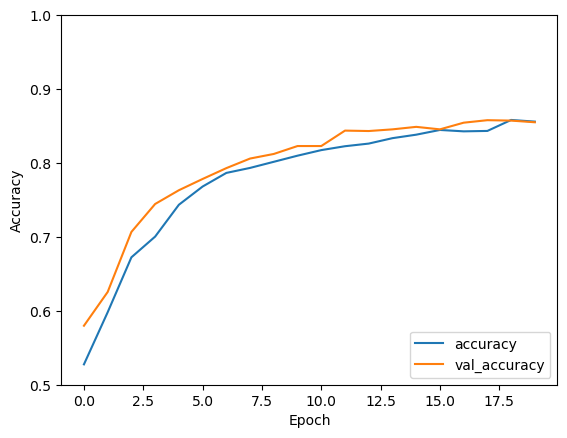

In [29]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model2.evaluate(valid_generator, verbose=2)

plt.savefig(result_root+'accuracy_after_tiling+augmnetaion_20epochs.png')

In [30]:
print(test_acc)

0.8460237383842468
